- [Demo 1: Autocorrelation](#auto_corr)
  * [Sinusoid](#sinusoid)  
  * [Random](#random)  
  * [Linear](#Linear)  
  * [Periodic + Random](#per_rand)  
  
- [Demo 2: Cross-Correlation](#cross_corr)  
- [Demo 3: Aliasing](#aliasing)

# Demo 1: Autocorrelation <a class="anchor" id="auto_corr"></a>

In [30]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider 
import matplotlib.gridspec as gridspec

In [31]:
# Set simulation parameters 
N    = 201
tmin = 0
tmax = 100
t    = np.linspace(tmin,tmax,N)

In [32]:
# Construct lac vector
lag_0   = 0.0 
lag_int = t[1] - t[0]
lag_fin = t[N-1]/4.

In [33]:
# vector of dimensionalized lags
lag_vec = np.arange(lag_0,lag_fin+lag_int,lag_int)

In [34]:
# vector of time indices representing closest match to specified lags
values  = np.expand_dims(lag_vec, axis=-1) 
lag_idx = np.abs(t - values).argmin(axis=-1)

# Sinusoid <a class="anchor" id="sinusoid"></a>

<IPython.core.display.Javascript object>


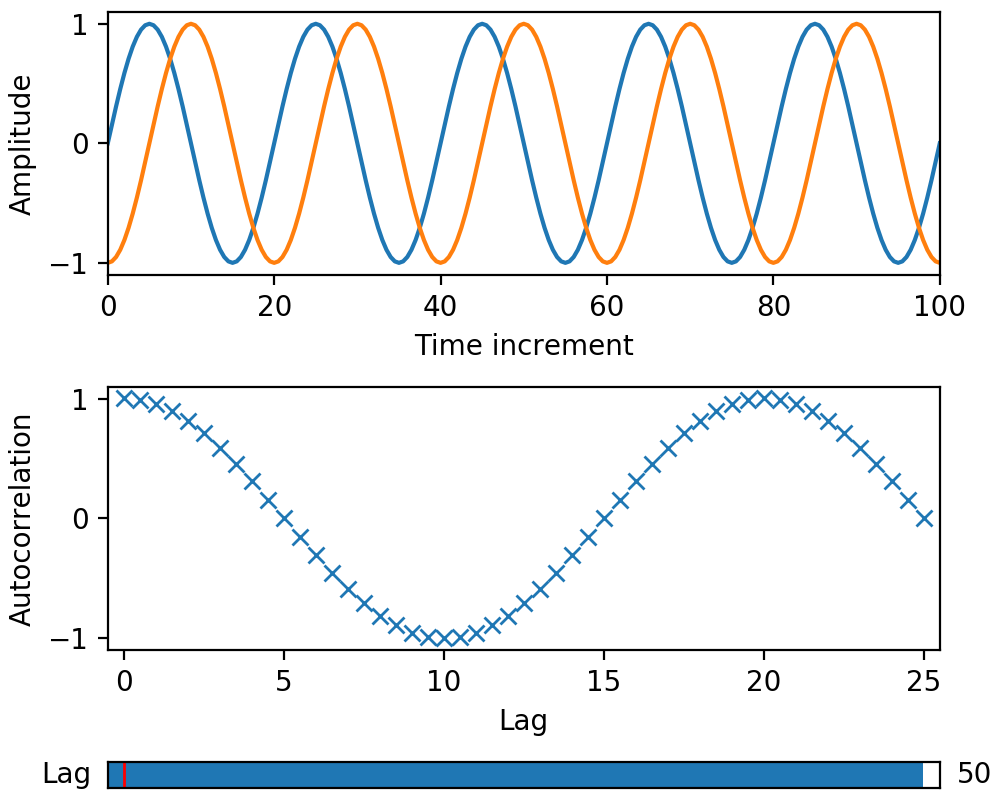

Text(0, 0.5, 'Autocorrelation')

In [35]:
fig0  = plt.figure(figsize=(5,4),constrained_layout=True)
# Create a spec instance with 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig0, height_ratios=[1,1,0.1])
# Create axis 0, which spans the first two columns
ax0   = fig0.add_subplot(spec0[0])
# Create axis 1, which spans the first two columns
ax1   = fig0.add_subplot(spec0[1])
# Create axis 2, which spans the final column
ax2   = fig0.add_subplot(spec0[2])
ax = [ax0,ax1,ax2]


# Original Signal
y        = np.sin(2*np.pi*t/20)    # create synthetic sinusoid
ymean    = np.mean(y)              # calculate sample mean
yvar     = np.var(y)               # calculate sample variance

k = 0
# Use Broadcasting to computing autocorr for all the lag values
y_lags   = np.sin(2*np.pi*(t.reshape(-1,1) - t[lag_idx].reshape(1,-1))/20.)
autocorr = np.sum( (y-ymean).reshape(-1,1)*(y_lags-ymean), axis=0)/(N-1-k)/yvar
# Amination Params
L_min    = 0                       # the minimial value of the Lag
L_max    = lag_idx.shape[0]        # the maximal value of the lag
L_init   = 1                       # the value of Lag to be used initially

# Original Signal 
ax[0].plot(t,y)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(-1.1, 1.1)

# Plot the line to be updated by sliders
sin_og, = ax[0].plot(t,y,)

# Plot the initial autocorr which will be updated by slider
auto_corr_plot, = ax[1].plot(t[0],autocorr[0],'x')
ax[1].set_xlim(-0.5, L_max/2)
ax[1].set_ylim(-1.1, 1.1)

# here we create the slider
L_slider = Slider(ax[2],          # the axes object containing the slider
                  'Lag',          # the name of the slider parameter
                  L_min,          # minimal value of the parameter
                  L_max,          # maximal value of the parameter
                  valinit=L_init, # initial value of the parameter
                  valstep=1.0,    # force discrete step in parameter,
                  valfmt ='%1.0f'
                 )

# Define the function that will update out plots with the slider value
def update(L):
    #L = np.floor(L)
    L = int(L)
    y_lag = np.sin(2*np.pi*(t-t[L])/20.)
    sin_og.set_ydata(y_lag)         # set new y-coordinates of the plotted points
    auto_corr_plot.set_xdata(t[:L+1])
    auto_corr_plot.set_ydata(autocorr[:L+1])
    auto_corr_plot.set_linestyle('None')
    auto_corr_plot.set_marker('x')    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
L_slider.on_changed(update)


ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')

# Random <a class="anchor" id="random"></a>

<IPython.core.display.Javascript object>


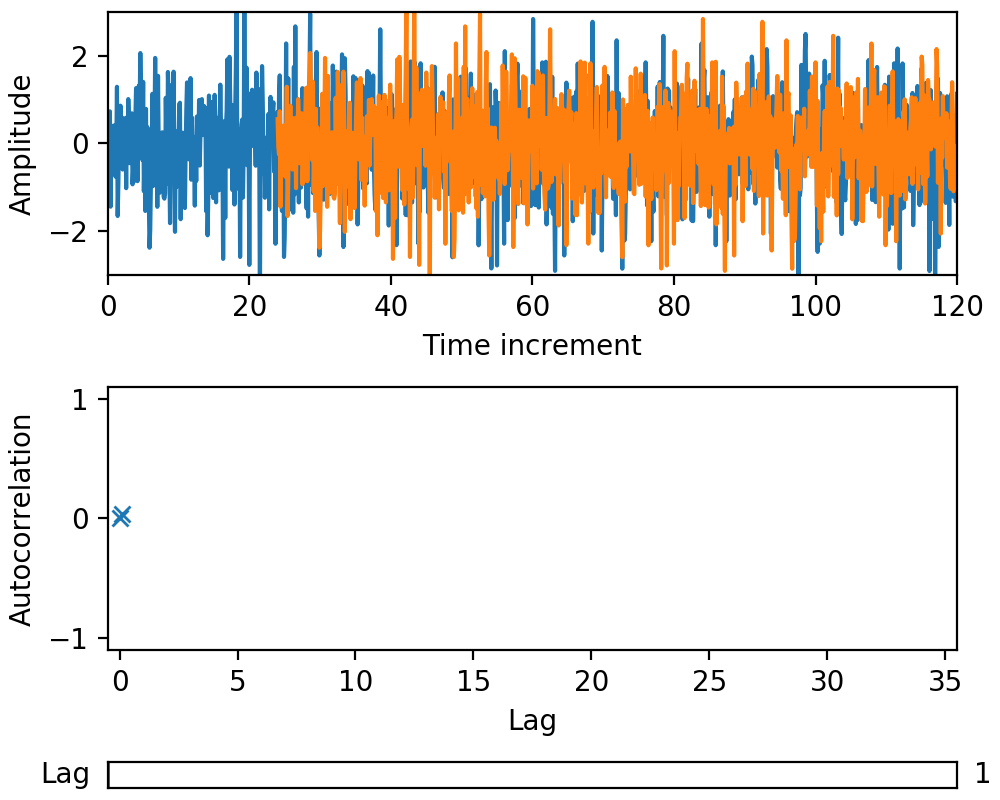

Text(0, 0.5, 'Autocorrelation')

In [28]:
fig1  = plt.figure(figsize=(5,4),constrained_layout=True)
# Create a spec instance with 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig1, height_ratios=[1,1,0.1])
# Create axis 0, which spans the first two columns
ax0   = fig1.add_subplot(spec0[0])
# Create axis 1, which spans the first two columns
ax1   = fig1.add_subplot(spec0[1])
# Create axis 2, which spans the final column
ax2   = fig1.add_subplot(spec0[2])
ax    = [ax0,ax1,ax2]


# Original Signal
y        = np.random.randn(t.shape[0])    # create synthetic sinusoid
ymean    = np.mean(y)                     # calculate sample mean
yvar     = np.var(y)                      # calculate sample variance
# Amination Params
L_min    = 1                       # the minimial value of the Lag
L_max    = lag_idx.shape[0]        # the maximal value of the lag
L_init   = 1                       # the value of Lag to be used initially

autocorr = np.zeros(lag_idx.shape[0],dtype=np.float)
for i in range(1,lag_idx.shape[0]):
    y1 = y[lag_idx[i]:]
    y2 = y[:0-lag_idx[i]]
    k  = lag_idx[i] - 1
    autocorr[i] = np.sum( (y1-ymean)*(y2-ymean) )/(N-1-k)/yvar
    
# Original Signal 
ax[0].plot(t,y)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(-3, 3)

# Plot the line to be updated by sliders
sin_og, = ax[0].plot(t,y,)

# Plot the initial autocorr which will be updated by slider
auto_corr_plot, = ax[1].plot(t[0],autocorr[0],'x')
ax[1].set_xlim(-0.5, L_max/2)
ax[1].set_ylim(-1.1, 1.1)

# here we create the slider
L_slider = Slider(ax[2],          # the axes object containing the slider
                  'Lag',          # the name of the slider parameter
                  L_min,          # minimal value of the parameter
                  L_max,          # maximal value of the parameter
                  valinit=L_init, # initial value of the parameter
                  valstep=1.0,    # force discrete step in parameter,
                  valfmt='%1.0f'
                 )

# Define the function that will update out plots with the slider value
def update(L):
    #L = np.floor(L)
    L = int(L)
    y_lag = y[:-lag_idx[L]]
    sin_og.set_xdata(t[lag_idx[L]:])
    sin_og.set_ydata(y_lag)          # set new y-coordinates of the plotted points
    auto_corr_plot.set_xdata(t[:L+1])
    auto_corr_plot.set_ydata(autocorr[:L+1])
    auto_corr_plot.set_linestyle('None')
    auto_corr_plot.set_marker('x')    
    fig1.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
L_slider.on_changed(update)


ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')

# Linear  <a class="anchor" id="Linear"></a>


<IPython.core.display.Javascript object>


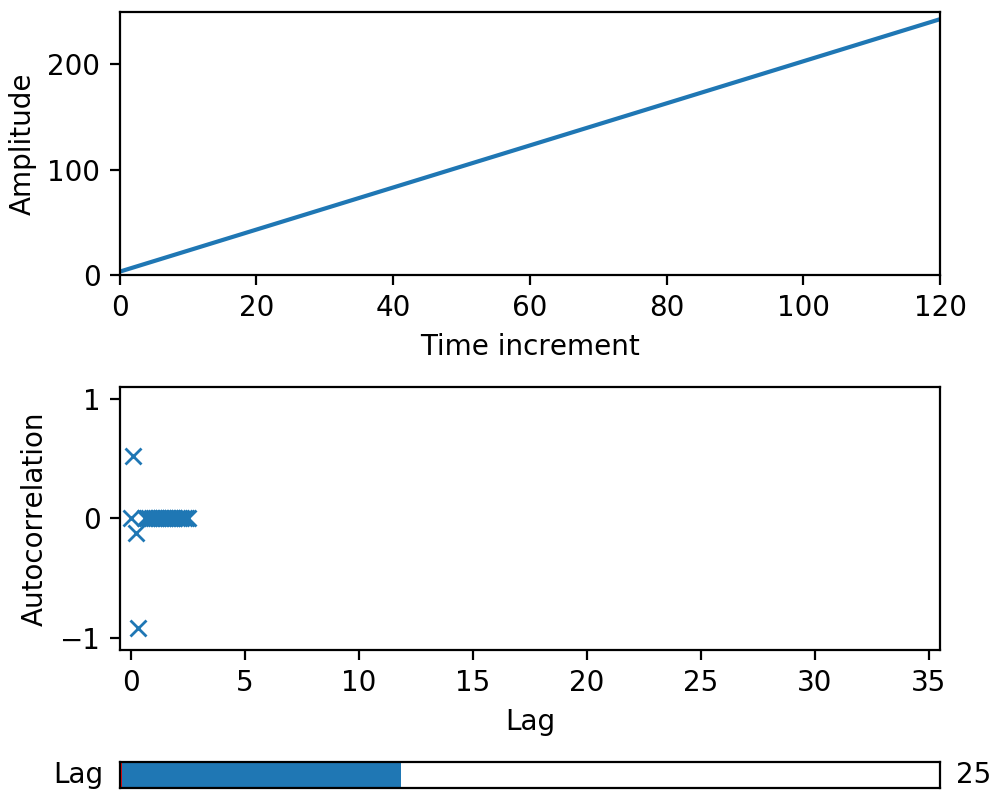

Text(0, 0.5, 'Autocorrelation')

In [27]:
fig2  = plt.figure(figsize=(5,4),constrained_layout=True)
# Create a spec instance with 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2, height_ratios=[1,1,0.1])
# Create axis 0, which spans the first two columns
ax0   = fig2.add_subplot(spec0[0])
# Create axis 1, which spans the first two columns
ax1   = fig2.add_subplot(spec0[1])
# Create axis 2, which spans the final column
ax2   = fig2.add_subplot(spec0[2])
ax = [ax0,ax1,ax2]


# Original Signal
b0       = 3.0
b1       = 2.0
y        = b1*t + b0                      # create synthetic sinusoid
ymean    = np.mean(y)                     # calculate sample mean
yvar     = np.var(y)                      # calculate sample variance
# Amination Params
L_min    = 1                       # the minimial value of the Lag
L_max    = lag_idx.shape[0]        # the maximal value of the lag
L_init   = 1                       # the value of Lag to be used initially

autocorr = np.zeros(lag_idx.shape[0],dtype=np.float)
for i in range(1,lag_idx.shape[0]):
    y1 = y[lag_idx[i]:]
    y2 = y[:0-lag_idx[i]]
    k  = lag_idx[i] - 1
    autocorr[i] = np.sum( (y1-ymean)*(y2-ymean) )/(N-1-k)/yvar
    
# Original Signal 
ax[0].plot(t,y)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(0, 250)

# Plot the line to be updated by sliders
sin_og, = ax[0].plot(t,y,)

# Plot the initial autocorr which will be updated by slider
auto_corr_plot, = ax[1].plot(t[0],autocorr[0],'x')
ax[1].set_xlim(-0.5, L_max/2)
ax[1].set_ylim(-1.1, 1.1)

# here we create the slider
L_slider = Slider(ax[2],          # the axes object containing the slider
                  'Lag',          # the name of the slider parameter
                  L_min,          # minimal value of the parameter
                  L_max,          # maximal value of the parameter
                  valinit=L_init, # initial value of the parameter
                  valstep=1.0,    # force discrete step in parameter,
                  valfmt='%1.0f'
                 )

# Define the function that will update out plots with the slider value
def update(L):
    #L = np.floor(L)
    L = int(L)
    y_lag = y[:-lag_idx[L]]
    sin_og.set_xdata(t[lag_idx[L]:])
    sin_og.set_ydata(y_lag)         # set new y-coordinates of the plotted points
    auto_corr_plot.set_xdata(t[:L+1])
    auto_corr_plot.set_ydata(autocorr[:L+1])
    auto_corr_plot.set_linestyle('None')
    auto_corr_plot.set_marker('x')    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
L_slider.on_changed(update)


ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')

# Periodic + random <a class="anchor" id="per_rand"></a>



<IPython.core.display.Javascript object>


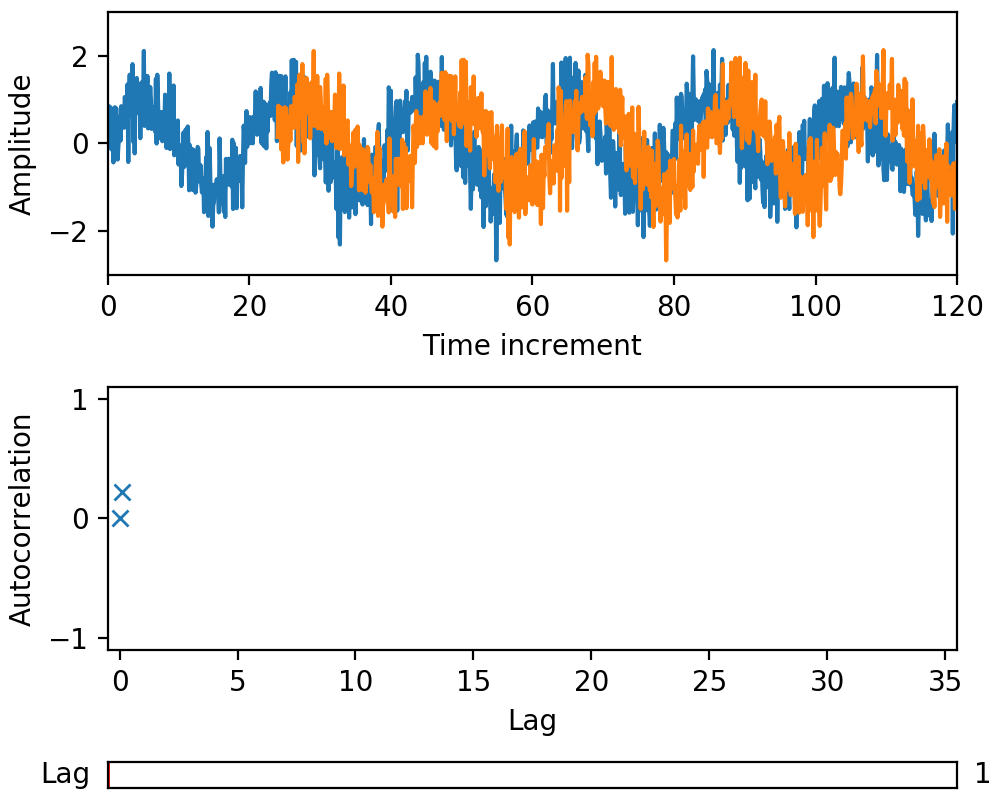

Text(0, 0.5, 'Autocorrelation')

In [26]:
fig3  = plt.figure(figsize=(5,4),constrained_layout=True)
# Create a spec instance with 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig3, height_ratios=[1,1,0.1])
# Create axis 0, which spans the first two columns
ax0   = fig3.add_subplot(spec0[0])
# Create axis 1, which spans the first two columns
ax1   = fig3.add_subplot(spec0[1])
# Create axis 2, which spans the final column
ax2   = fig3.add_subplot(spec0[2])
ax = [ax0,ax1,ax2]


# Original Signal
A        = 0.5
# create synthetic sinusoid
y        = np.sin(2*np.pi*t/20)+A*np.random.randn(t.shape[0])
ymean    = np.mean(y)                     # calculate sample mean
yvar     = np.var(y)                      # calculate sample variance
# Amination Params
L_min    = 1                       # the minimial value of the Lag
L_max    = lag_idx.shape[0]        # the maximal value of the lag
L_init   = 1                       # the value of Lag to be used initially

autocorr = np.zeros(lag_idx.shape[0],dtype=np.float)
for i in range(1,lag_idx.shape[0]):
    y1 = y[lag_idx[i]:]
    y2 = y[:0-lag_idx[i]]
    k  = lag_idx[i] - 1
    autocorr[i] = np.sum( (y1-ymean)*(y2-ymean) )/(N-1-k)/yvar
    
# Original Signal 
ax[0].plot(t,y)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(-3, 3)

# Plot the line to be updated by sliders
sin_og, = ax[0].plot(t,y,)

# Plot the initial autocorr which will be updated by slider
auto_corr_plot, = ax[1].plot(t[0],autocorr[0],'x')
ax[1].set_xlim(-0.5, L_max/2)
ax[1].set_ylim(-1.1, 1.1)

# here we create the slider
L_slider = Slider(ax[2],          # the axes object containing the slider
                  'Lag',          # the name of the slider parameter
                  L_min,          # minimal value of the parameter
                  L_max,          # maximal value of the parameter
                  valinit=L_init, # initial value of the parameter
                  valstep=1.0,    # force discrete step in parameter,
                  valfmt='%1.0f'
                 )

# Define the function that will update out plots with the slider value
def update(L):
    #L = np.floor(L)
    L = int(L)
    y_lag = y[:-lag_idx[L]]
    sin_og.set_xdata(t[lag_idx[L]:])
    sin_og.set_ydata(y_lag)         # set new y-coordinates of the plotted points
    auto_corr_plot.set_xdata(t[:L+1])
    auto_corr_plot.set_ydata(autocorr[:L+1])
    auto_corr_plot.set_linestyle('None')
    auto_corr_plot.set_marker('x')    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
L_slider.on_changed(update)


ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')

# Cross-correlation example <a class="anchor" id="cross_corr"></a>

In [10]:
from scipy.interpolate import interp1d

# load first timeseries
BP_DR_num = np.loadtxt('BP_DR_num.txt',skiprows=1,delimiter=',')
# load second timeseries
T_DR_num  = np.loadtxt('T_DR_num.txt',skiprows=1,delimiter=',')

In [11]:
BP_DR_num.shape[0]

135678

In [12]:
# assign time vectors and downsample, 
tBP = BP_DR_num[:,0]   - BP_DR_num[:,0].min()
tAT = T_DR_num[:T_DR_num.shape[0]:12,0] - T_DR_num[:,0].min()

In [15]:
# Jumping ahead in the course here: spline is used to interpolate
# barometric pressure data onto air-temperature time vector

BP = interp1d(tBP, BP_DR_num[:,1])(tAT[:-2])   # barometric pressure
AT = T_DR_num[::12,1][:-2]                     # air temperature 

N  = tAT[::-2].shape[0]                        # calculate length of records

<IPython.core.display.Javascript object>


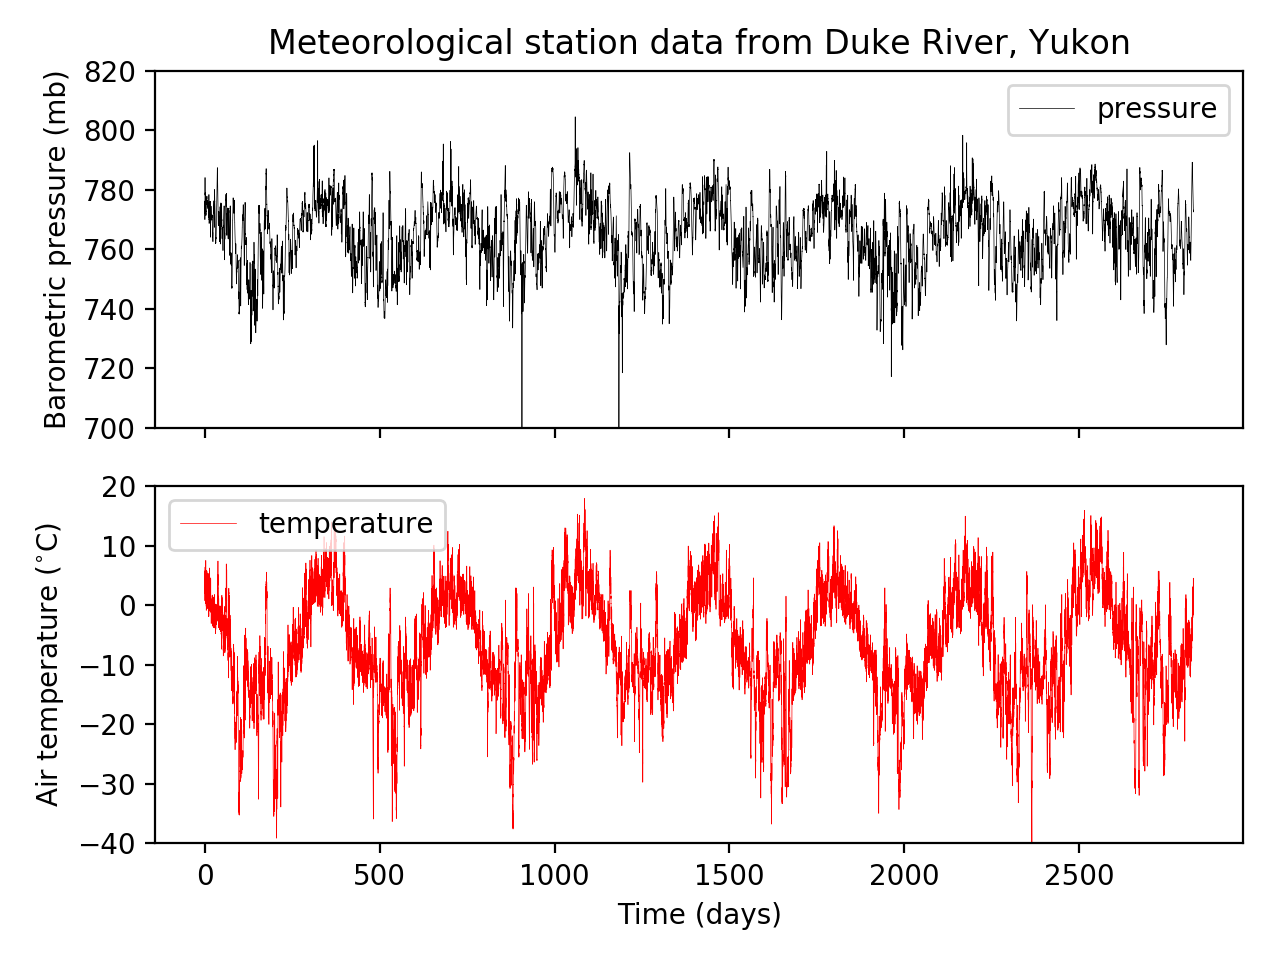

In [16]:
fig5, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(tAT[:-2],BP,'k',lw=0.25,label='pressure')
ax[0].set_ylim(700,820)
ax[0].set_ylabel('Barometric pressure (mb)')
ax[0].set_title('Meteorological station data from Duke River, Yukon')
ax[0].legend()

ax[1].plot(tAT[:-2],AT,'r',lw=0.25,label='temperature')
ax[1].set_ylim(-40,20)
ax[1].set_ylabel('Air temperature ($^{\circ}$C)')
ax[1].set_xlabel('Time (days)')
ax[1].legend()

fig5.tight_layout()

In [17]:
lag_initial  = 0;          # set min lag to zero
lag_interval = 10;         # set lag interval in days
lag_final    = tAT[-1]/4   # set max lag relative to data length
  
lag_vec      = np.arange(lag_initial,lag_final,lag_interval)

In [18]:
# vector of time indices representing closest match to specified lags
values  = np.expand_dims(lag_vec, axis=-1) 
lag_idx = np.abs(tAT - values).argmin(axis=-1)

In [19]:
BPmean = BP.mean()          # calculate sample 1 mean
ATmean = AT.mean()          # calculate sample 2 mean

In [20]:
lag_vec

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
       550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
       660., 670., 680., 690., 700.])

<IPython.core.display.Javascript object>


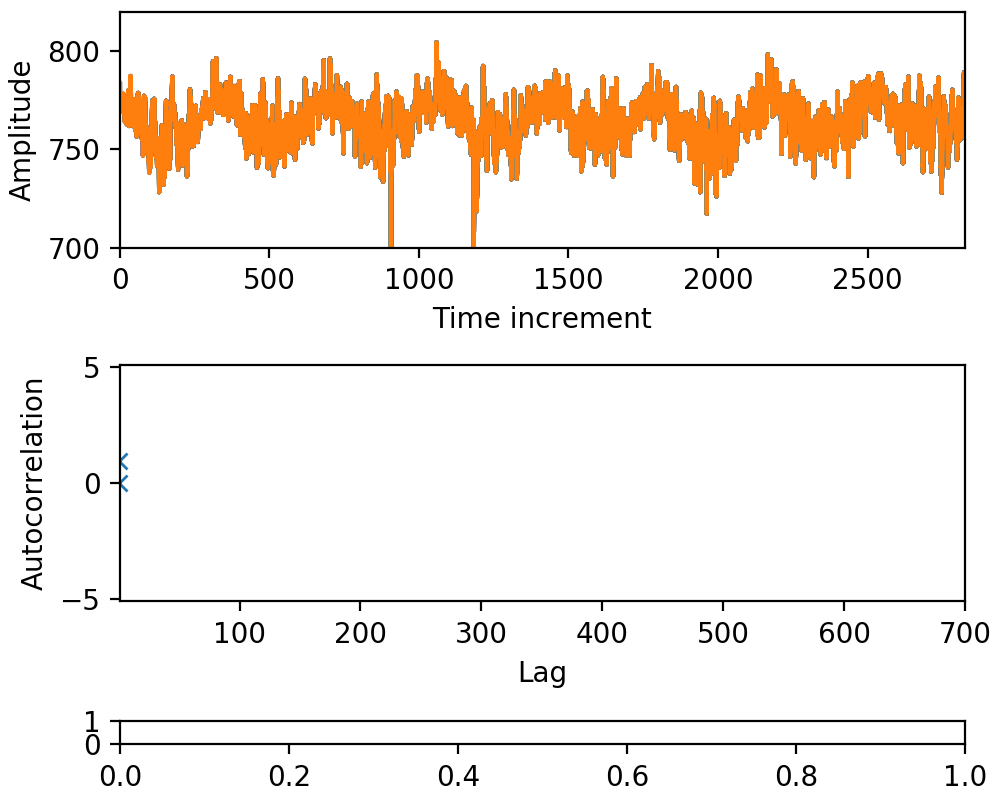

Text(0, 0.5, 'Autocorrelation')

In [21]:
fig6  = plt.figure(figsize=(5,4),constrained_layout=True)
# Create a spec instance with 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig6, height_ratios=[1,1,0.1])
# Create axis 0, which spans the first two columns
ax0   = fig6.add_subplot(spec0[0])
# Create axis 1, which spans the first two columns
ax1   = fig6.add_subplot(spec0[1])
# Create axis 2, which spans the final column
ax2   = fig6.add_subplot(spec0[2])
ax = [ax0,ax1,ax2]


# Original Signal
A        = 0.5
# create synthetic sinusoid
y        = np.sin(2*np.pi*t/20)+A*np.random.randn(t.shape[0])
ymean    = np.mean(y)                     # calculate sample mean
yvar     = np.var(y)                      # calculate sample variance
# Amination Params
L_min    = 1                       # the minimial value of the Lag
L_max    = lag_idx.shape[0]        # the maximal value of the lag
L_init   = 10                      # the value of Lag to be used initially

autocorr = np.zeros(lag_idx.shape[0],dtype=np.float)
for i in range(1,lag_idx.shape[0]):
    BP_trunc = BP[lag_idx[i]:]     # truncate original timeseries
    AT_trunc = AT[:-lag_idx[i]]    # truncate moving timeseries
    BP_trunc_std = np.std(BP_trunc)# calculate std
    AT_trunc_std = np.std(AT_trunc)# calculate std
    k  = lag_idx[i] - 1
    autocorr[i] = np.sum((BP_trunc-BPmean)*(AT_trunc-BP_trunc_std))\
                         /(N-1-k)/BP_trunc_std/AT_trunc_std
    
    ax[0].plot(tAT[:-2][lag_idx[i]:], BP_trunc)

# Original Signal 
ax[0].plot(tAT[:-2],BP)
ax[0].set_xlim(tAT[:-2][0], tAT[:-2][-1])
ax[0].set_ylim(700,820)

# Plot the line to be updated by sliders
update_plt, = ax[0].plot(tAT[:-2],BP)

# Plot the initial autocorr which will be updated by slider
auto_corr_plot, = ax[1].plot(lag_vec[0],autocorr[0],'x')
ax[1].set_xlim(L_min, lag_vec[-1])
ax[1].set_ylim(-5.1, 5.1)

# # here we create the slider
# L_slider = Slider(ax[2],          # the axes object containing the slider
#                   'Lag',          # the name of the slider parameter
#                   L_min,          # minimal value of the parameter
#                   L_max,          # maximal value of the parameter
#                   valinit=L_init, # initial value of the parameter
#                   valstep=1.0,    # force discrete step in parameter,
#                   valfmt='%1.0f'
#                  )

# # Define the function that will update out plots with the slider value
# def update(L):
#     L = int(L)
#     y_lag = y[:-lag_idx[L]]
# #     update_plt.set_xdata(tAT[lag_idx[L]:])
# #     update_plt.set_ydata(y_lag)          # set new y-coordinates of the plotted points
#     auto_corr_plot.set_xdata(lag_vec[:L+1])
#     auto_corr_plot.set_ydata(autocorr[:L+1])
#     auto_corr_plot.set_linestyle('None')
#     auto_corr_plot.set_marker('x')    
#     fig.canvas.draw_idle()          # redraw the plot

# # the final step is to specify that the slider needs to
# # execute the above function when its value changes
# L_slider.on_changed(update)


ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')

In [22]:
lag_idx[i]

16800

In [23]:
AT_trunc.shape

(51038,)

# Demo 3: Aliasing <a class="anchor" id="aliasing"></a>

In [24]:
# set simulation parameters
N    = 1201                     
tmin = 0.0     
tmax = 120.0
t,dt = np.linspace(tmin, tmax, N,retstep=True)
# create synthetic sinusoid with small offset
y    = np.sin(2*np.pi*(t-2)/24.)

<IPython.core.display.Javascript object>


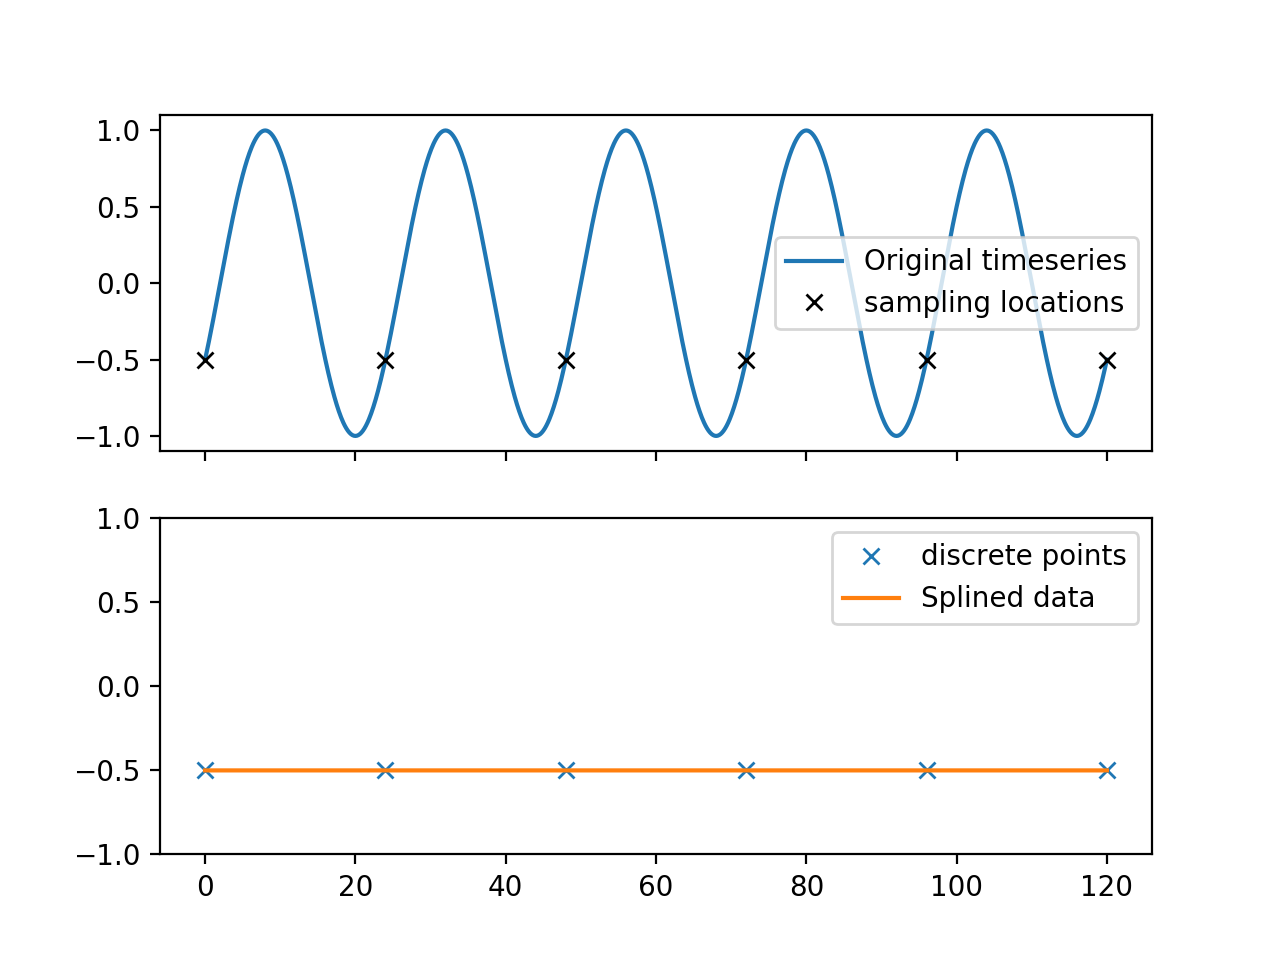

In [25]:
# set sampling interval in hours (e.g. 1,6,12,18,24)
tsample = 24
t_idx   = np.round(tsample/dt).astype(int)

fig7, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(t,y,label='Original timeseries')
ax[0].plot(t[::t_idx],y[::t_idx],'kx',label='sampling locations')
ax[0].legend()

ax[1].plot(t[::t_idx],y[::t_idx],'x',label='discrete points')
ax[1].plot(t,interp1d(t[::t_idx],y[::t_idx])(t),label='Splined data')
ax[1].set_ylim(-1.0,1.0)
ax[1].legend()